In [ ]:
# EDA(exploratory Data Analysis)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('titanic_train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull() #not a good practise


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

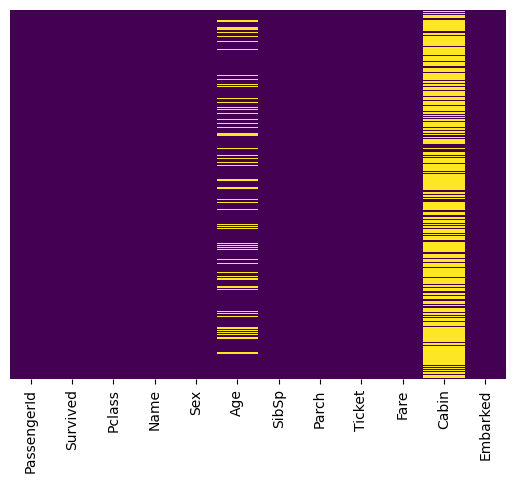

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

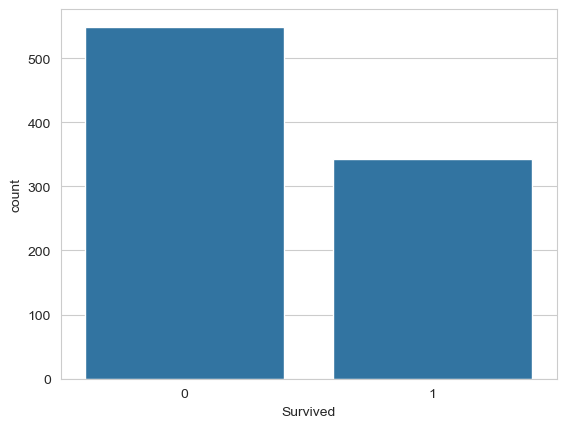

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<Axes: xlabel='Survived', ylabel='count'>

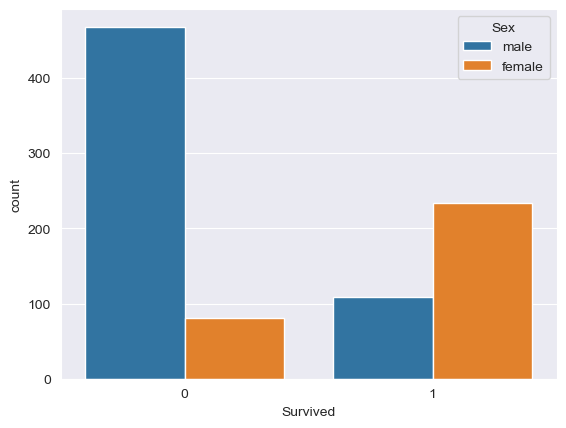

In [13]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train)

<Axes: xlabel='Age', ylabel='Count'>

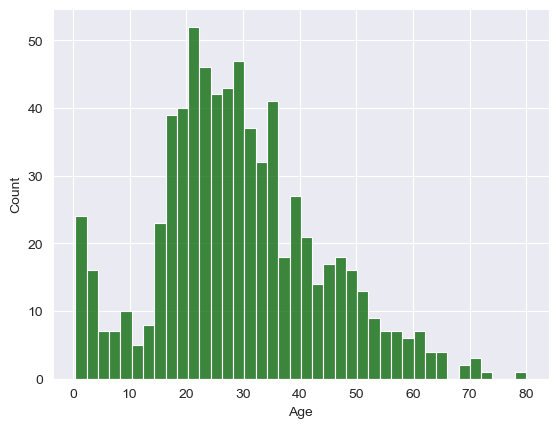

In [25]:
sns.histplot(train['Age'].dropna(), bins=40, color='darkgreen', kde=False)


<Axes: xlabel='Fare', ylabel='Count'>

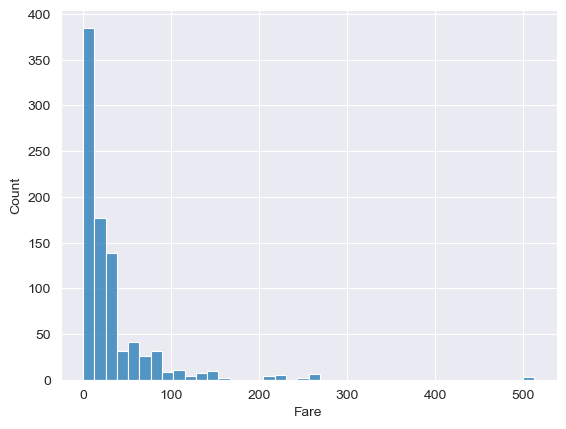

In [26]:
sns.histplot(train['Fare'],bins=40,kde=False)

C:\Users\User\AppData\Local\Temp\ipykernel_19136\2200201755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age', data=train, palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

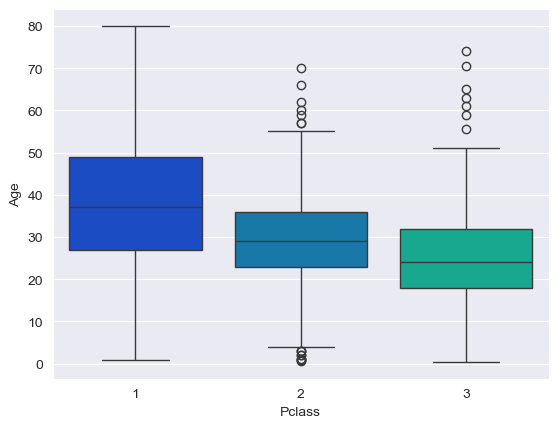

In [31]:
#avg age of people accoring to there class(1(upper class), 2("middle class"),3("lower class"))
sns.boxplot(x='Pclass',y='Age', data=train, palette='winter')

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 26

        else:
            return Age

In [42]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1) #for every age and pclass it is going to apply impute age function

C:\Users\User\AppData\Local\Temp\ipykernel_19136\4045491.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\User\AppData\Local\Temp\ipykernel_19136\4045491.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

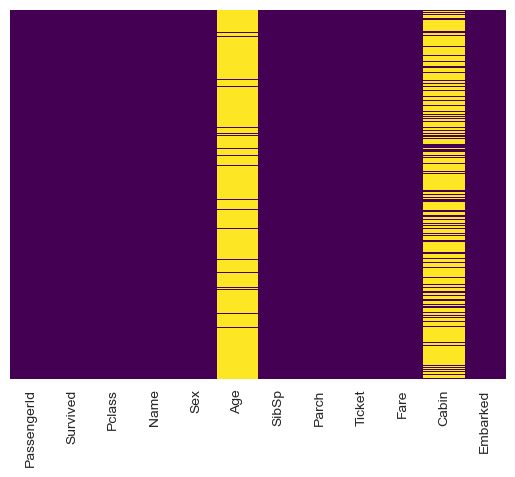

In [43]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')